# Importing Training and Test Datasets

In [1]:
import pandas as pd
Train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/Primary cohort from Norway.csv')
Train_df

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
...,...,...,...,...
110199,0,0,1,1
110200,0,1,1,1
110201,70,1,1,1
110202,0,0,1,1


In [2]:
y = Train_df['hospital_outcome_1alive_0dead']
X = Train_df.drop('hospital_outcome_1alive_0dead', axis=1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Weighting Majority and Minority



In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf


tf.random.set_seed(42)

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

# class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 2)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
class_weights

{0: 6.77759840098401, 1: 0.5398241467566343}

In [11]:
# Fit the model with balanced class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
2756/2756 [==============================] - 8s 2ms/step - loss: 0.6940 - Accuracy: 0.3006 - val_loss: 0.7011 - val_Accuracy: 0.4357
Epoch 2/20
2756/2756 [==============================] - 9s 3ms/step - loss: 0.6499 - Accuracy: 0.4695 - val_loss: 0.6509 - val_Accuracy: 0.5652
Epoch 3/20
2756/2756 [==============================] - 8s 3ms/step - loss: 0.6337 - Accuracy: 0.5368 - val_loss: 0.6458 - val_Accuracy: 0.5652
Epoch 4/20
2756/2756 [==============================] - 11s 4ms/step - loss: 0.6267 - Accuracy: 0.5598 - val_loss: 0.6811 - val_Accuracy: 0.5331
Epoch 5/20
2756/2756 [==============================] - 13s 5ms/step - loss: 0.6240 - Accuracy: 0.5718 - val_loss: 0.6782 - val_Accuracy: 0.5331
Epoch 6/20
2756/2756 [==============================] - 12s 4ms/step - loss: 0.6230 - Accuracy: 0.5755 - val_loss: 0.6205 - val_Accuracy: 0.5980
Epoch 7/20
2756/2756 [==============================] - 7s 3ms/step - loss: 0.6224 - Accuracy: 0.5803 - val_loss: 0.6693 - val_Accura

In [12]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the primary cohort')

from sklearn.metrics import average_precision_score
pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

from sklearn.metrics import recall_score
tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

from sklearn.metrics import precision_score
ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


689/689 [==============================] - 3s 5ms/step

Training and testing on the primary cohort
PR AUC: 0.947050814315523
ROC AUC: 0.6413609980797227
TP rate: 0.6281311154598825
TN rate: 0.6545908806995627
PPV: 0.9587066905615292
NPV: 0.12117007746560296
MCC: 0.15027614349388857
F1 Score: 0.7589855757862378
Accuracy: 0.630053082890976


### Stat results
When comparing this model to the other models in Table 5, it closely resembles the performance of the Naive Bayes Model. This similarity is likely due to the need to balance the weight of each class during model training, as implemented in the code. Because the model consistently attempted to predict all values as true, possibly because the classes were unbalanced with 92.65% of all applicants in the primary cohort being positive, it suggests that this predictor may not be the best fit for predicting whether a patient lives or dies. This close resemblance to the Naive Bayes model, which relies on conditional probability, indicates that our neural network may not effectively handle conditional probabilities of features, rendering it an inadequate predictor.

## Shap on Primary Cohort

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.PermutationExplainer(model.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   5%|▌         | 10/200 [00:00<?, ?it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 12/200 [00:11<01:43,  1.81it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▋         | 13/200 [00:12<03:10,  1.02s/it]

9/9 [==============================] - 0s 6ms/step


PermutationExplainer explainer:   7%|▋         | 14/200 [00:14<04:03,  1.31s/it]

13/13 [==============================] - 0s 4ms/step


PermutationExplainer explainer:   8%|▊         | 15/200 [00:17<05:26,  1.76s/it]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 16/200 [00:19<05:24,  1.76s/it]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [00:20<04:45,  1.56s/it]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   9%|▉         | 18/200 [00:21<04:22,  1.44s/it]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [00:22<04:01,  1.34s/it]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [00:23<03:55,  1.31s/it]

10/10 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [00:24<03:45,  1.26s/it]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [00:25<03:10,  1.07s/it]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [00:26<02:44,  1.08it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [00:26<02:24,  1.22it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [00:27<02:13,  1.32it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [00:28<02:06,  1.37it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [00:28<01:58,  1.46it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [00:29<02:01,  1.41it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [00:30<02:04,  1.37it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [00:30<02:05,  1.36it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [00:31<02:06,  1.33it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [00:32<02:04,  1.35it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [00:33<01:55,  1.44it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [00:33<01:52,  1.48it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [00:34<01:46,  1.55it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [00:34<01:42,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [00:35<01:43,  1.58it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [00:36<01:40,  1.62it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [00:36<01:38,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [00:37<01:36,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [00:37<01:37,  1.62it/s]

11/11 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [00:38<01:33,  1.69it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [00:38<01:32,  1.69it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [00:39<01:31,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [00:40<01:32,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [00:40<01:33,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [00:41<01:30,  1.69it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [00:42<01:32,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [00:42<01:39,  1.52it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [00:43<01:40,  1.49it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [00:44<01:50,  1.35it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [00:45<01:54,  1.29it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [00:46<01:57,  1.25it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [00:46<01:45,  1.38it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [00:47<01:39,  1.46it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [00:47<01:35,  1.50it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [00:48<01:32,  1.55it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [00:49<01:31,  1.55it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [00:49<01:29,  1.58it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [00:50<01:25,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [00:50<01:24,  1.65it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [00:51<01:23,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [00:52<01:19,  1.71it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [00:52<01:21,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [00:53<01:19,  1.71it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [00:53<01:20,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [00:54<01:17,  1.72it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [00:54<01:16,  1.72it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [00:55<01:14,  1.75it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [00:56<01:21,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [00:57<01:26,  1.49it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [00:57<01:31,  1.41it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [00:58<01:32,  1.37it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [00:59<01:35,  1.32it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [01:00<01:28,  1.41it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [01:00<01:24,  1.47it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [01:01<01:21,  1.52it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [01:01<01:17,  1.58it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [01:02<01:14,  1.63it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [01:03<01:14,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [01:03<01:14,  1.59it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [01:04<01:13,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [01:04<01:13,  1.60it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [01:05<01:11,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [01:06<01:11,  1.62it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [01:06<01:09,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [01:07<01:09,  1.62it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [01:07<01:08,  1.63it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [01:08<01:07,  1.64it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [01:09<01:08,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [01:09<01:11,  1.53it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [01:10<01:15,  1.44it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [01:11<01:14,  1.43it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [01:12<01:14,  1.41it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [01:13<01:20,  1.31it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [01:13<01:14,  1.39it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [01:14<01:09,  1.47it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [01:14<01:06,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [01:15<01:04,  1.56it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [01:16<01:02,  1.60it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [01:16<01:01,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [01:17<01:01,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [01:17<01:00,  1.62it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [01:18<00:57,  1.66it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [01:19<00:57,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [01:19<00:56,  1.68it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [01:20<00:55,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [01:20<00:56,  1.62it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [01:21<00:55,  1.63it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [01:22<00:55,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [01:22<00:53,  1.65it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [01:23<00:56,  1.55it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [01:24<00:58,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [01:25<01:01,  1.41it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [01:25<01:02,  1.35it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [01:26<01:04,  1.31it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [01:27<00:58,  1.41it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [01:27<00:55,  1.48it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [01:28<00:52,  1.54it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [01:28<00:49,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [01:29<00:47,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [01:30<00:45,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [01:30<00:44,  1.72it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [01:31<00:45,  1.67it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [01:31<00:44,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [01:32<00:43,  1.68it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [01:33<00:44,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [01:33<00:43,  1.65it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [01:34<00:42,  1.68it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [01:34<00:41,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [01:35<00:41,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [01:36<00:41,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [01:36<00:40,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [01:37<00:43,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [01:38<00:45,  1.43it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [01:39<00:46,  1.39it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [01:39<00:48,  1.31it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [01:40<00:45,  1.37it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [01:41<00:42,  1.42it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [01:41<00:41,  1.46it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [01:42<00:38,  1.51it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [01:43<00:37,  1.56it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [01:43<00:35,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [01:44<00:34,  1.64it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [01:44<00:33,  1.63it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [01:45<00:32,  1.64it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [01:46<00:32,  1.64it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [01:46<00:31,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [01:47<00:29,  1.73it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [01:47<00:29,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [01:48<00:28,  1.72it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [01:48<00:28,  1.70it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [01:49<00:28,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [01:50<00:26,  1.72it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [01:50<00:28,  1.56it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [01:51<00:29,  1.47it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [01:52<00:30,  1.43it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [01:53<00:29,  1.41it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [01:53<00:30,  1.36it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [01:54<00:30,  1.29it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [01:55<00:31,  1.22it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [01:56<00:31,  1.22it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [01:57<00:28,  1.30it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [01:57<00:25,  1.43it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [01:58<00:23,  1.50it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [01:58<00:21,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [01:59<00:20,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [02:00<00:19,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [02:00<00:18,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [02:01<00:17,  1.68it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [02:01<00:16,  1.73it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [02:02<00:16,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [02:02<00:15,  1.70it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [02:03<00:15,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [02:04<00:15,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [02:04<00:15,  1.54it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [02:05<00:15,  1.45it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [02:06<00:15,  1.41it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [02:07<00:15,  1.35it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [02:07<00:14,  1.41it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [02:08<00:13,  1.45it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [02:09<00:11,  1.51it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [02:09<00:10,  1.56it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [02:10<00:10,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [02:10<00:09,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [02:11<00:08,  1.62it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [02:12<00:07,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [02:12<00:07,  1.71it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [02:13<00:06,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [02:13<00:05,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [02:14<00:05,  1.70it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [02:15<00:04,  1.67it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [02:15<00:04,  1.69it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [02:16<00:03,  1.74it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [02:16<00:02,  1.70it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [02:17<00:02,  1.73it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [02:18<00:01,  1.56it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [02:18<00:01,  1.47it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [02:19<00:00,  1.40it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [02:20<00:00,  1.34it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 201it [02:21,  1.35it/s]


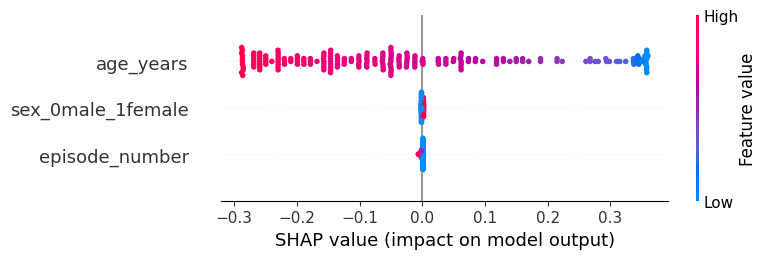

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot
Based on the Shap data plot, we observe that in training and testing on the primary cohort, the neural network appears to have the highest feature importance on age years, while other features such as sex and episode number do not seem to affect the prediction of being dead or alive. The Shap algorithm predicts that individuals with a lower age are more likely to experience death, while those with a higher age are more likely to survive in this study.

# Training and testing on the study cohort

In [ ]:
Test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/Study cohort (a subset of the primary cohort) from Norway.csv')
y = Test_df['hospital_outcome_1alive_0dead']
X = Test_df.drop('hospital_outcome_1alive_0dead', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

# class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                40        
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
477/477 [==============================] - 4s 4ms/step - loss: 0.8487 - Accuracy: 0.2127 - val_loss: 0.7551 - val_Accuracy: 0.2034
Epoch 2/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7416 - Accuracy: 0.2388 - val_loss: 0.7386 - val_Accuracy: 0.2034
Epoch 3/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7336 - Accuracy: 0.3993 - val_loss: 0.7331 - val_Accuracy: 0.2034
Epoch 4/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7302 - Accuracy: 0.3894 - val_loss: 0.7293 - val_Accuracy: 0.2034
Epoch 5/20
477/477 [==============================] - 4s 8ms/step - loss: 0.7272 - Accuracy: 0.2346 - val_loss: 0.7260 - val_Accuracy: 0.2034
Epoch 6/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7243 - Accuracy: 0.5935 - val_loss: 0.7233 - val_Accuracy: 0.2034
Epoch 7/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7214 - Accuracy: 0.3638 - val_loss: 0.7189 - val_Accuracy: 0.7966
Epoch 

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


120/120 [==============================] - 0s 2ms/step

Training and testing on the study cohort
PR AUC: 0.8149084666739619
ROC AUC: 0.5537908538399422
TP rate: 0.4766139657444005
TN rate: 0.6309677419354839
PPV: 0.8349682631275245
NPV: 0.23532242540904716
MCC: 0.08695971657474084
F1 Score: 0.6068358146361921
Accuracy: 0.5080031487798478


### Stat Results
Similar to the primary cohort, the study subset cohort also correlates closely with the Naive Bayes model, indicating that the neural network is not sufficient for modeling conditional probabilities. Therefore, it may be advisable to explore alternative models that can better handle conditional probability. Increasing the dataset size and adding more diverse features could address the model's limitations in predicting outcomes. From the Shap model, it is evident that the network primarily relies on patient age for predictions, highlighting the need for additional data and feature diversity to enhance model training.

Additionally, it is worth noting that boosting algorithms, such as Gradient Boosting, tend to outperform Naive Bayes under certain conditions by learning from previous trees' incorrect predictions. In contrast, the neural network appeared inclined to predict all outcomes similarly, resulting in accuracy being largely determined by the percentage of applicants with a death outcome. Therefore, machine learning algorithms that self-correct on incorrect predictions may offer better performance than the neural network when working with this dataset.

## Shap on Study Cohort

In [ ]:
explainer = shap.PermutationExplainer(model.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [00:00<?, ?it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [00:10<01:01,  2.93it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [00:11<01:38,  1.83it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [00:12<01:54,  1.57it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [00:13<02:08,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [00:13<02:00,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [00:14<01:54,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [00:15<01:47,  1.62it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [00:15<01:48,  1.60it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [00:16<01:50,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [00:16<01:49,  1.58it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [00:17<01:49,  1.57it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [00:18<01:44,  1.62it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [00:18<01:43,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [00:19<01:41,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [00:19<01:37,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [00:20<01:39,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [00:21<01:35,  1.72it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [00:21<01:34,  1.74it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [00:22<01:35,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [00:22<01:34,  1.72it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [00:23<01:36,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [00:24<01:46,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [00:25<01:52,  1.41it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [00:25<01:52,  1.40it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [00:26<01:56,  1.34it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [00:27<01:50,  1.41it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [00:27<01:45,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [00:28<01:41,  1.52it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [00:29<01:37,  1.57it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [00:29<01:32,  1.64it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [00:30<01:30,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [00:30<01:27,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [00:31<01:29,  1.67it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [00:31<01:27,  1.69it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [00:32<01:28,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [00:33<01:28,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [00:33<01:30,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [00:34<01:28,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [00:35<01:26,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [00:35<01:24,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [00:36<01:24,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [00:36<01:25,  1.64it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [00:37<01:31,  1.52it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [00:38<01:37,  1.42it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [00:39<01:39,  1.38it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [00:40<01:44,  1.31it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [00:40<01:37,  1.39it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [00:41<01:32,  1.44it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [00:41<01:28,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [00:42<01:23,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [00:43<01:18,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [00:43<01:14,  1.74it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [00:44<01:16,  1.69it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [00:44<01:13,  1.73it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [00:45<01:14,  1.71it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [00:45<01:15,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [00:46<01:16,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [00:47<01:17,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [00:47<01:15,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [00:48<01:15,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [00:49<01:13,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [00:49<01:15,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [00:50<01:14,  1.60it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [00:51<01:18,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [00:51<01:19,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [00:52<01:22,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [00:53<01:25,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [00:54<01:24,  1.34it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [00:54<01:20,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [00:55<01:18,  1.42it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [00:56<01:13,  1.51it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [00:56<01:10,  1.56it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [00:57<01:10,  1.55it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [00:57<01:08,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [00:58<01:09,  1.55it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [00:59<01:06,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [00:59<01:06,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [01:00<01:05,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [01:01<01:05,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [01:01<01:04,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [01:02<01:01,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [01:02<01:02,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [01:03<01:01,  1.60it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [01:04<01:05,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [01:05<01:07,  1.44it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [01:05<01:09,  1.37it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [01:06<01:10,  1.34it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [01:07<01:21,  1.15it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [01:08<01:13,  1.26it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [01:08<01:06,  1.38it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [01:09<01:02,  1.45it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [01:10<01:00,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [01:10<00:57,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [01:11<00:56,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [01:12<00:56,  1.54it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [01:12<00:53,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [01:13<00:53,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [01:13<00:51,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [01:14<00:48,  1.70it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [01:15<00:49,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [01:15<00:48,  1.66it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [01:16<00:48,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [01:16<00:48,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [01:17<00:46,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [01:18<00:48,  1.60it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [01:18<00:51,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [01:19<00:53,  1.40it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [01:20<00:54,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [01:21<00:55,  1.32it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [01:21<00:51,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [01:22<00:48,  1.45it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [01:23<00:44,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [01:23<00:43,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [01:24<00:41,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [01:25<00:46,  1.43it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [01:26<00:50,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [01:26<00:46,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [01:27<00:44,  1.44it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [01:27<00:42,  1.48it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [01:28<00:40,  1.53it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [01:29<00:38,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [01:29<00:36,  1.63it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [01:30<00:35,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [01:30<00:34,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [01:31<00:35,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [01:32<00:38,  1.47it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [01:33<00:41,  1.33it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [01:34<00:41,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [01:34<00:40,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [01:35<00:37,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [01:36<00:34,  1.49it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [01:36<00:32,  1.52it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [01:37<00:31,  1.55it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [01:37<00:29,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [01:38<00:29,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [01:39<00:29,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [01:39<00:28,  1.59it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [01:40<00:27,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [01:40<00:26,  1.64it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [01:41<00:25,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [01:42<00:25,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [01:42<00:24,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [01:43<00:24,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [01:44<00:23,  1.61it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [01:44<00:23,  1.61it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [01:45<00:24,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [01:46<00:24,  1.42it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [01:47<00:24,  1.36it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [01:47<00:25,  1.32it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [01:48<00:24,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [01:49<00:22,  1.36it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [01:49<00:20,  1.44it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [01:50<00:19,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [01:51<00:18,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [01:51<00:17,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [01:52<00:16,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [01:52<00:15,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [01:53<00:14,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [01:54<00:14,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [01:54<00:13,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [01:55<00:12,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [01:55<00:11,  1.68it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [01:56<00:11,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [01:57<00:10,  1.72it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [01:57<00:10,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [01:58<00:09,  1.70it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [01:59<00:09,  1.53it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [01:59<00:09,  1.43it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [02:00<00:09,  1.40it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [02:01<00:09,  1.31it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [02:02<00:08,  1.25it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [02:03<00:07,  1.32it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [02:03<00:06,  1.41it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [02:04<00:05,  1.51it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [02:04<00:04,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [02:05<00:03,  1.65it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [02:05<00:03,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [02:06<00:02,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [02:07<00:01,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [02:07<00:01,  1.58it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [02:08<00:00,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [02:09<00:00,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 201it [02:09,  1.42it/s]


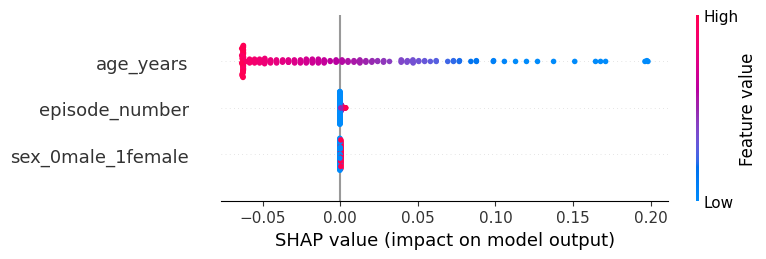

In [ ]:
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot
Considering the study cohort, the Shap graph demonstrates similar results to the previous one, with both showing that age is the most important feature. However, the second most important feature is episode number instead of sex, as seen in the previous graph. It appears that episode number and sex are not significant in helping predict the model outcome, indicating that individuals with lower age are more likely to experience death, while those with higher age are more likely to survive in this model.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# SMOTE


In [20]:
from imblearn.over_sampling import SMOTE

# X_train, X_test, y_train, y_test

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                40        
                                                                 
 dense_17 (Dense)            (None, 5)                 55        
                                                                 
 dense_18 (Dense)            (None, 2)                 12        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(X_res, y_res, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
5104/5104 [==============================] - 14s 3ms/step - loss: 0.9057 - Accuracy: 0.5278 - val_loss: 2.2148 - val_Accuracy: 0.1338
Epoch 2/20
5104/5104 [==============================] - 13s 3ms/step - loss: 0.8840 - Accuracy: 0.5334 - val_loss: 2.0855 - val_Accuracy: 0.1356
Epoch 3/20
5104/5104 [==============================] - 13s 3ms/step - loss: 0.8754 - Accuracy: 0.5332 - val_loss: 2.1847 - val_Accuracy: 0.1386
Epoch 4/20
5104/5104 [==============================] - 18s 3ms/step - loss: 0.8718 - Accuracy: 0.5355 - val_loss: 2.2156 - val_Accuracy: 0.1371
Epoch 5/20
5104/5104 [==============================] - 16s 3ms/step - loss: 0.8710 - Accuracy: 0.5356 - val_loss: 2.1422 - val_Accuracy: 0.1442
Epoch 6/20
5104/5104 [==============================] - 14s 3ms/step - loss: 0.8705 - Accuracy: 0.5378 - val_loss: 2.1603 - val_Accuracy: 0.1442
Epoch 7/20
5104/5104 [==============================] - 13s 3ms/step - loss: 0.8702 - Accuracy: 0.5161 - val_loss: 2.1479 - val_Ac

In [22]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


689/689 [==============================] - 1s 2ms/step

Training and testing on the study cohort
PR AUC: 0.9273626423483508
ROC AUC: 0.5
TP rate: 0.0
TN rate: 1.0
PPV: 0.0
NPV: 0.07263735765164919
MCC: 0.0
F1 Score: 0.0
Accuracy: 0.07263735765164919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training and testing on the study cohort

In [ ]:
Test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/Study cohort (a subset of the primary cohort) from Norway.csv')
y = Test_df['hospital_outcome_1alive_0dead']
X = Test_df.drop('hospital_outcome_1alive_0dead', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

# class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                40        
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
477/477 [==============================] - 4s 4ms/step - loss: 0.8487 - Accuracy: 0.2127 - val_loss: 0.7551 - val_Accuracy: 0.2034
Epoch 2/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7416 - Accuracy: 0.2388 - val_loss: 0.7386 - val_Accuracy: 0.2034
Epoch 3/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7336 - Accuracy: 0.3993 - val_loss: 0.7331 - val_Accuracy: 0.2034
Epoch 4/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7302 - Accuracy: 0.3894 - val_loss: 0.7293 - val_Accuracy: 0.2034
Epoch 5/20
477/477 [==============================] - 4s 8ms/step - loss: 0.7272 - Accuracy: 0.2346 - val_loss: 0.7260 - val_Accuracy: 0.2034
Epoch 6/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7243 - Accuracy: 0.5935 - val_loss: 0.7233 - val_Accuracy: 0.2034
Epoch 7/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7214 - Accuracy: 0.3638 - val_loss: 0.7189 - val_Accuracy: 0.7966
Epoch 

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


120/120 [==============================] - 0s 2ms/step

Training and testing on the study cohort
PR AUC: 0.8149084666739619
ROC AUC: 0.5537908538399422
TP rate: 0.4766139657444005
TN rate: 0.6309677419354839
PPV: 0.8349682631275245
NPV: 0.23532242540904716
MCC: 0.08695971657474084
F1 Score: 0.6068358146361921
Accuracy: 0.5080031487798478


### Stat Results
Similar to the primary cohort, the study subset cohort also correlates closely with the Naive Bayes model, indicating that the neural network is not sufficient for modeling conditional probabilities. Therefore, it may be advisable to explore alternative models that can better handle conditional probability. Increasing the dataset size and adding more diverse features could address the model's limitations in predicting outcomes. From the Shap model, it is evident that the network primarily relies on patient age for predictions, highlighting the need for additional data and feature diversity to enhance model training.

Additionally, it is worth noting that boosting algorithms, such as Gradient Boosting, tend to outperform Naive Bayes under certain conditions by learning from previous trees' incorrect predictions. In contrast, the neural network appeared inclined to predict all outcomes similarly, resulting in accuracy being largely determined by the percentage of applicants with a death outcome. Therefore, machine learning algorithms that self-correct on incorrect predictions may offer better performance than the neural network when working with this dataset.

## Shap on Study Cohort

In [ ]:
explainer = shap.PermutationExplainer(model.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [00:00<?, ?it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [00:10<01:01,  2.93it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [00:11<01:38,  1.83it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [00:12<01:54,  1.57it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [00:13<02:08,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [00:13<02:00,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [00:14<01:54,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [00:15<01:47,  1.62it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [00:15<01:48,  1.60it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [00:16<01:50,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [00:16<01:49,  1.58it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [00:17<01:49,  1.57it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [00:18<01:44,  1.62it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [00:18<01:43,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [00:19<01:41,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [00:19<01:37,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [00:20<01:39,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [00:21<01:35,  1.72it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [00:21<01:34,  1.74it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [00:22<01:35,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [00:22<01:34,  1.72it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [00:23<01:36,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [00:24<01:46,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [00:25<01:52,  1.41it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [00:25<01:52,  1.40it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [00:26<01:56,  1.34it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [00:27<01:50,  1.41it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [00:27<01:45,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [00:28<01:41,  1.52it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [00:29<01:37,  1.57it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [00:29<01:32,  1.64it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [00:30<01:30,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [00:30<01:27,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [00:31<01:29,  1.67it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [00:31<01:27,  1.69it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [00:32<01:28,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [00:33<01:28,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [00:33<01:30,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [00:34<01:28,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [00:35<01:26,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [00:35<01:24,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [00:36<01:24,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [00:36<01:25,  1.64it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [00:37<01:31,  1.52it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [00:38<01:37,  1.42it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [00:39<01:39,  1.38it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [00:40<01:44,  1.31it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [00:40<01:37,  1.39it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [00:41<01:32,  1.44it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [00:41<01:28,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [00:42<01:23,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [00:43<01:18,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [00:43<01:14,  1.74it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [00:44<01:16,  1.69it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [00:44<01:13,  1.73it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [00:45<01:14,  1.71it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [00:45<01:15,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [00:46<01:16,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [00:47<01:17,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [00:47<01:15,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [00:48<01:15,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [00:49<01:13,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [00:49<01:15,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [00:50<01:14,  1.60it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [00:51<01:18,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [00:51<01:19,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [00:52<01:22,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [00:53<01:25,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [00:54<01:24,  1.34it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [00:54<01:20,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [00:55<01:18,  1.42it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [00:56<01:13,  1.51it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [00:56<01:10,  1.56it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [00:57<01:10,  1.55it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [00:57<01:08,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [00:58<01:09,  1.55it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [00:59<01:06,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [00:59<01:06,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [01:00<01:05,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [01:01<01:05,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [01:01<01:04,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [01:02<01:01,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [01:02<01:02,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [01:03<01:01,  1.60it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [01:04<01:05,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [01:05<01:07,  1.44it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [01:05<01:09,  1.37it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [01:06<01:10,  1.34it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [01:07<01:21,  1.15it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [01:08<01:13,  1.26it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [01:08<01:06,  1.38it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [01:09<01:02,  1.45it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [01:10<01:00,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [01:10<00:57,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [01:11<00:56,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [01:12<00:56,  1.54it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [01:12<00:53,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [01:13<00:53,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [01:13<00:51,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [01:14<00:48,  1.70it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [01:15<00:49,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [01:15<00:48,  1.66it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [01:16<00:48,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [01:16<00:48,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [01:17<00:46,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [01:18<00:48,  1.60it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [01:18<00:51,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [01:19<00:53,  1.40it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [01:20<00:54,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [01:21<00:55,  1.32it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [01:21<00:51,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [01:22<00:48,  1.45it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [01:23<00:44,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [01:23<00:43,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [01:24<00:41,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [01:25<00:46,  1.43it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [01:26<00:50,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [01:26<00:46,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [01:27<00:44,  1.44it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [01:27<00:42,  1.48it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [01:28<00:40,  1.53it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [01:29<00:38,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [01:29<00:36,  1.63it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [01:30<00:35,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [01:30<00:34,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [01:31<00:35,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [01:32<00:38,  1.47it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [01:33<00:41,  1.33it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [01:34<00:41,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [01:34<00:40,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [01:35<00:37,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [01:36<00:34,  1.49it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [01:36<00:32,  1.52it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [01:37<00:31,  1.55it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [01:37<00:29,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [01:38<00:29,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [01:39<00:29,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [01:39<00:28,  1.59it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [01:40<00:27,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [01:40<00:26,  1.64it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [01:41<00:25,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [01:42<00:25,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [01:42<00:24,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [01:43<00:24,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [01:44<00:23,  1.61it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [01:44<00:23,  1.61it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [01:45<00:24,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [01:46<00:24,  1.42it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [01:47<00:24,  1.36it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [01:47<00:25,  1.32it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [01:48<00:24,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [01:49<00:22,  1.36it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [01:49<00:20,  1.44it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [01:50<00:19,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [01:51<00:18,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [01:51<00:17,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [01:52<00:16,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [01:52<00:15,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [01:53<00:14,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [01:54<00:14,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [01:54<00:13,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [01:55<00:12,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [01:55<00:11,  1.68it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [01:56<00:11,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [01:57<00:10,  1.72it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [01:57<00:10,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [01:58<00:09,  1.70it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [01:59<00:09,  1.53it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [01:59<00:09,  1.43it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [02:00<00:09,  1.40it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [02:01<00:09,  1.31it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [02:02<00:08,  1.25it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [02:03<00:07,  1.32it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [02:03<00:06,  1.41it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [02:04<00:05,  1.51it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [02:04<00:04,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [02:05<00:03,  1.65it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [02:05<00:03,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [02:06<00:02,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [02:07<00:01,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [02:07<00:01,  1.58it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [02:08<00:00,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [02:09<00:00,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 201it [02:09,  1.42it/s]


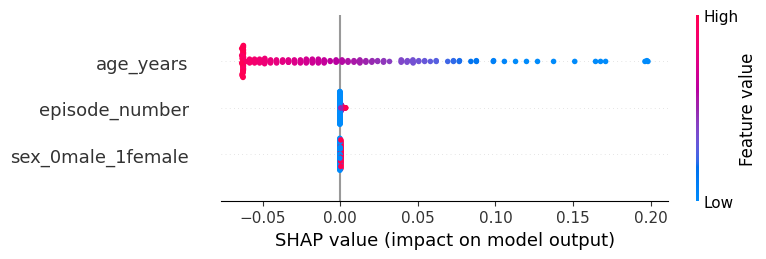

In [ ]:
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot
Considering the study cohort, the Shap graph demonstrates similar results to the previous one, with both showing that age is the most important feature. However, the second most important feature is episode number instead of sex, as seen in the previous graph. It appears that episode number and sex are not significant in helping predict the model outcome, indicating that individuals with lower age are more likely to experience death, while those with higher age are more likely to survive in this model.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# Random Over Sample

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)

X_res, y_res = ros.fit_resample(X, y)

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                40        
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit(X_res, y_res, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
6382/6382 [==============================] - 37s 3ms/step - loss: 1.4414 - Accuracy: 0.4999 - val_loss: 2.4359 - val_Accuracy: 0.0726
Epoch 2/20
6382/6382 [==============================] - 19s 3ms/step - loss: 0.9754 - Accuracy: 0.5000 - val_loss: 2.4274 - val_Accuracy: 0.0726
Epoch 3/20
6382/6382 [==============================] - 22s 3ms/step - loss: 0.9633 - Accuracy: 0.5000 - val_loss: 2.4386 - val_Accuracy: 0.0726
Epoch 4/20
6382/6382 [==============================] - 24s 4ms/step - loss: 0.9633 - Accuracy: 0.5000 - val_loss: 2.4374 - val_Accuracy: 0.0726
Epoch 5/20
6382/6382 [==============================] - 17s 3ms/step - loss: 0.9633 - Accuracy: 0.5000 - val_loss: 2.4073 - val_Accuracy: 0.0726
Epoch 6/20
6382/6382 [==============================] - 19s 3ms/step - loss: 0.9633 - Accuracy: 0.5000 - val_loss: 2.4297 - val_Accuracy: 0.0726
Epoch 7/20
6382/6382 [==============================] - 16s 3ms/step - loss: 0.9633 - Accuracy: 0.5000 - val_loss: 2.4010 - val_Ac

In [25]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


689/689 [==============================] - 1s 1ms/step

Training and testing on the study cohort
PR AUC: 0.9273626423483508
ROC AUC: 0.5
TP rate: 0.0
TN rate: 1.0
PPV: 0.0
NPV: 0.07263735765164919
MCC: 0.0
F1 Score: 0.0
Accuracy: 0.07263735765164919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training and testing on the study cohort

In [ ]:
Test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/Study cohort (a subset of the primary cohort) from Norway.csv')
y = Test_df['hospital_outcome_1alive_0dead']
X = Test_df.drop('hospital_outcome_1alive_0dead', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

# class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                40        
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
477/477 [==============================] - 4s 4ms/step - loss: 0.8487 - Accuracy: 0.2127 - val_loss: 0.7551 - val_Accuracy: 0.2034
Epoch 2/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7416 - Accuracy: 0.2388 - val_loss: 0.7386 - val_Accuracy: 0.2034
Epoch 3/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7336 - Accuracy: 0.3993 - val_loss: 0.7331 - val_Accuracy: 0.2034
Epoch 4/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7302 - Accuracy: 0.3894 - val_loss: 0.7293 - val_Accuracy: 0.2034
Epoch 5/20
477/477 [==============================] - 4s 8ms/step - loss: 0.7272 - Accuracy: 0.2346 - val_loss: 0.7260 - val_Accuracy: 0.2034
Epoch 6/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7243 - Accuracy: 0.5935 - val_loss: 0.7233 - val_Accuracy: 0.2034
Epoch 7/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7214 - Accuracy: 0.3638 - val_loss: 0.7189 - val_Accuracy: 0.7966
Epoch 

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


120/120 [==============================] - 0s 2ms/step

Training and testing on the study cohort
PR AUC: 0.8149084666739619
ROC AUC: 0.5537908538399422
TP rate: 0.4766139657444005
TN rate: 0.6309677419354839
PPV: 0.8349682631275245
NPV: 0.23532242540904716
MCC: 0.08695971657474084
F1 Score: 0.6068358146361921
Accuracy: 0.5080031487798478


### Stat Results
Similar to the primary cohort, the study subset cohort also correlates closely with the Naive Bayes model, indicating that the neural network is not sufficient for modeling conditional probabilities. Therefore, it may be advisable to explore alternative models that can better handle conditional probability. Increasing the dataset size and adding more diverse features could address the model's limitations in predicting outcomes. From the Shap model, it is evident that the network primarily relies on patient age for predictions, highlighting the need for additional data and feature diversity to enhance model training.

Additionally, it is worth noting that boosting algorithms, such as Gradient Boosting, tend to outperform Naive Bayes under certain conditions by learning from previous trees' incorrect predictions. In contrast, the neural network appeared inclined to predict all outcomes similarly, resulting in accuracy being largely determined by the percentage of applicants with a death outcome. Therefore, machine learning algorithms that self-correct on incorrect predictions may offer better performance than the neural network when working with this dataset.

## Shap on Study Cohort

In [ ]:
explainer = shap.PermutationExplainer(model.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [00:00<?, ?it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [00:10<01:01,  2.93it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [00:11<01:38,  1.83it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [00:12<01:54,  1.57it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [00:13<02:08,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [00:13<02:00,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [00:14<01:54,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [00:15<01:47,  1.62it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [00:15<01:48,  1.60it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [00:16<01:50,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [00:16<01:49,  1.58it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [00:17<01:49,  1.57it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [00:18<01:44,  1.62it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [00:18<01:43,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [00:19<01:41,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [00:19<01:37,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [00:20<01:39,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [00:21<01:35,  1.72it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [00:21<01:34,  1.74it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [00:22<01:35,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [00:22<01:34,  1.72it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [00:23<01:36,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [00:24<01:46,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [00:25<01:52,  1.41it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [00:25<01:52,  1.40it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [00:26<01:56,  1.34it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [00:27<01:50,  1.41it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [00:27<01:45,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [00:28<01:41,  1.52it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [00:29<01:37,  1.57it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [00:29<01:32,  1.64it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [00:30<01:30,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [00:30<01:27,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [00:31<01:29,  1.67it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [00:31<01:27,  1.69it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [00:32<01:28,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [00:33<01:28,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [00:33<01:30,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [00:34<01:28,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [00:35<01:26,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [00:35<01:24,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [00:36<01:24,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [00:36<01:25,  1.64it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [00:37<01:31,  1.52it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [00:38<01:37,  1.42it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [00:39<01:39,  1.38it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [00:40<01:44,  1.31it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [00:40<01:37,  1.39it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [00:41<01:32,  1.44it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [00:41<01:28,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [00:42<01:23,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [00:43<01:18,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [00:43<01:14,  1.74it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [00:44<01:16,  1.69it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [00:44<01:13,  1.73it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [00:45<01:14,  1.71it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [00:45<01:15,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [00:46<01:16,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [00:47<01:17,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [00:47<01:15,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [00:48<01:15,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [00:49<01:13,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [00:49<01:15,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [00:50<01:14,  1.60it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [00:51<01:18,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [00:51<01:19,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [00:52<01:22,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [00:53<01:25,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [00:54<01:24,  1.34it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [00:54<01:20,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [00:55<01:18,  1.42it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [00:56<01:13,  1.51it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [00:56<01:10,  1.56it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [00:57<01:10,  1.55it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [00:57<01:08,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [00:58<01:09,  1.55it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [00:59<01:06,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [00:59<01:06,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [01:00<01:05,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [01:01<01:05,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [01:01<01:04,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [01:02<01:01,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [01:02<01:02,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [01:03<01:01,  1.60it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [01:04<01:05,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [01:05<01:07,  1.44it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [01:05<01:09,  1.37it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [01:06<01:10,  1.34it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [01:07<01:21,  1.15it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [01:08<01:13,  1.26it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [01:08<01:06,  1.38it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [01:09<01:02,  1.45it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [01:10<01:00,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [01:10<00:57,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [01:11<00:56,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [01:12<00:56,  1.54it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [01:12<00:53,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [01:13<00:53,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [01:13<00:51,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [01:14<00:48,  1.70it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [01:15<00:49,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [01:15<00:48,  1.66it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [01:16<00:48,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [01:16<00:48,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [01:17<00:46,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [01:18<00:48,  1.60it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [01:18<00:51,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [01:19<00:53,  1.40it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [01:20<00:54,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [01:21<00:55,  1.32it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [01:21<00:51,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [01:22<00:48,  1.45it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [01:23<00:44,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [01:23<00:43,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [01:24<00:41,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [01:25<00:46,  1.43it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [01:26<00:50,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [01:26<00:46,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [01:27<00:44,  1.44it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [01:27<00:42,  1.48it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [01:28<00:40,  1.53it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [01:29<00:38,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [01:29<00:36,  1.63it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [01:30<00:35,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [01:30<00:34,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [01:31<00:35,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [01:32<00:38,  1.47it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [01:33<00:41,  1.33it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [01:34<00:41,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [01:34<00:40,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [01:35<00:37,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [01:36<00:34,  1.49it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [01:36<00:32,  1.52it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [01:37<00:31,  1.55it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [01:37<00:29,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [01:38<00:29,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [01:39<00:29,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [01:39<00:28,  1.59it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [01:40<00:27,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [01:40<00:26,  1.64it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [01:41<00:25,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [01:42<00:25,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [01:42<00:24,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [01:43<00:24,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [01:44<00:23,  1.61it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [01:44<00:23,  1.61it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [01:45<00:24,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [01:46<00:24,  1.42it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [01:47<00:24,  1.36it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [01:47<00:25,  1.32it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [01:48<00:24,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [01:49<00:22,  1.36it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [01:49<00:20,  1.44it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [01:50<00:19,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [01:51<00:18,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [01:51<00:17,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [01:52<00:16,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [01:52<00:15,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [01:53<00:14,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [01:54<00:14,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [01:54<00:13,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [01:55<00:12,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [01:55<00:11,  1.68it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [01:56<00:11,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [01:57<00:10,  1.72it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [01:57<00:10,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [01:58<00:09,  1.70it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [01:59<00:09,  1.53it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [01:59<00:09,  1.43it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [02:00<00:09,  1.40it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [02:01<00:09,  1.31it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [02:02<00:08,  1.25it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [02:03<00:07,  1.32it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [02:03<00:06,  1.41it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [02:04<00:05,  1.51it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [02:04<00:04,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [02:05<00:03,  1.65it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [02:05<00:03,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [02:06<00:02,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [02:07<00:01,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [02:07<00:01,  1.58it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [02:08<00:00,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [02:09<00:00,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 201it [02:09,  1.42it/s]


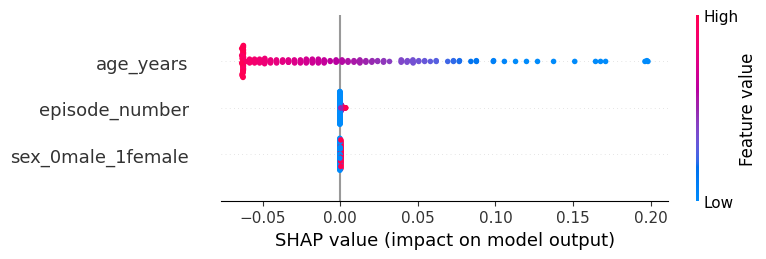

In [ ]:
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot
Considering the study cohort, the Shap graph demonstrates similar results to the previous one, with both showing that age is the most important feature. However, the second most important feature is episode number instead of sex, as seen in the previous graph. It appears that episode number and sex are not significant in helping predict the model outcome, indicating that individuals with lower age are more likely to experience death, while those with higher age are more likely to survive in this model.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# Undersampling


In [26]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(
    sampling_strategy='auto', n_neighbors=200, kind_sel='all')
X_res, y_res = enn.fit_resample(X_train, y_train)

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])
model.summary()

In [27]:
history = model.fit(X_res, y_res, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
383/383 [==============================] - 2s 5ms/step - loss: 0.9341 - Accuracy: 0.5317 - val_loss: 2.4936 - val_Accuracy: 0.0726
Epoch 2/20
383/383 [==============================] - 2s 6ms/step - loss: 0.9333 - Accuracy: 0.5317 - val_loss: 2.5194 - val_Accuracy: 0.0726
Epoch 3/20
383/383 [==============================] - 4s 9ms/step - loss: 0.9332 - Accuracy: 0.5317 - val_loss: 2.5313 - val_Accuracy: 0.0726
Epoch 4/20
383/383 [==============================] - 6s 17ms/step - loss: 0.9332 - Accuracy: 0.5317 - val_loss: 2.5314 - val_Accuracy: 0.0726
Epoch 5/20
383/383 [==============================] - 2s 6ms/step - loss: 0.9333 - Accuracy: 0.5317 - val_loss: 2.5293 - val_Accuracy: 0.0726
Epoch 6/20
383/383 [==============================] - 2s 5ms/step - loss: 0.9332 - Accuracy: 0.5317 - val_loss: 2.5323 - val_Accuracy: 0.0726
Epoch 7/20
383/383 [==============================] - 2s 5ms/step - loss: 0.9332 - Accuracy: 0.5317 - val_loss: 2.5368 - val_Accuracy: 0.0726
Epoch

In [28]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

689/689 [==============================] - 1s 1ms/step

Training and testing on the study cohort
PR AUC: 0.9273626423483508
ROC AUC: 0.5
TP rate: 0.0
TN rate: 1.0
PPV: 0.0
NPV: 0.07263735765164919
MCC: 0.0
F1 Score: 0.0
Accuracy: 0.07263735765164919


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training and testing on the study cohort

In [ ]:
Test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/Study cohort (a subset of the primary cohort) from Norway.csv')
y = Test_df['hospital_outcome_1alive_0dead']
X = Test_df.drop('hospital_outcome_1alive_0dead', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

# class_weights_dict = dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                40        
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 2)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, class_weight=class_weights, validation_data=(X_test, y_test))

Epoch 1/20
477/477 [==============================] - 4s 4ms/step - loss: 0.8487 - Accuracy: 0.2127 - val_loss: 0.7551 - val_Accuracy: 0.2034
Epoch 2/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7416 - Accuracy: 0.2388 - val_loss: 0.7386 - val_Accuracy: 0.2034
Epoch 3/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7336 - Accuracy: 0.3993 - val_loss: 0.7331 - val_Accuracy: 0.2034
Epoch 4/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7302 - Accuracy: 0.3894 - val_loss: 0.7293 - val_Accuracy: 0.2034
Epoch 5/20
477/477 [==============================] - 4s 8ms/step - loss: 0.7272 - Accuracy: 0.2346 - val_loss: 0.7260 - val_Accuracy: 0.2034
Epoch 6/20
477/477 [==============================] - 2s 5ms/step - loss: 0.7243 - Accuracy: 0.5935 - val_loss: 0.7233 - val_Accuracy: 0.2034
Epoch 7/20
477/477 [==============================] - 3s 6ms/step - loss: 0.7214 - Accuracy: 0.3638 - val_loss: 0.7189 - val_Accuracy: 0.7966
Epoch 

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)
y_pred_classes

print()
print('Training and testing on the study cohort')

pr_auc = average_precision_score(y_test, y_pred_classes)
print("PR AUC:", pr_auc)

roc_auc = roc_auc_score(y_test, y_pred_classes)
print("ROC AUC:", roc_auc)

tp_rate = recall_score(y_test, y_pred_classes)
print("TP rate:", tp_rate)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
tn_rate = tn / (tn + fp)
print("TN rate:", tn_rate)

ppv = precision_score(y_test, y_pred_classes)
print("PPV:", ppv)

# pos_label parameter set to 0, indicating the negative class. It takes the
#   true labels (y_test) and predicted labels (y_pred_binary) as inputs and
#   computes the negative precision (NPV) score
npv = precision_score(y_test, y_pred_classes, pos_label=0)
print("NPV:", npv)

mcc = matthews_corrcoef(y_test, y_pred_classes)
print("MCC:", mcc)

f1 = f1_score(y_test, y_pred_classes)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


120/120 [==============================] - 0s 2ms/step

Training and testing on the study cohort
PR AUC: 0.8149084666739619
ROC AUC: 0.5537908538399422
TP rate: 0.4766139657444005
TN rate: 0.6309677419354839
PPV: 0.8349682631275245
NPV: 0.23532242540904716
MCC: 0.08695971657474084
F1 Score: 0.6068358146361921
Accuracy: 0.5080031487798478


### Stat Results
Similar to the primary cohort, the study subset cohort also correlates closely with the Naive Bayes model, indicating that the neural network is not sufficient for modeling conditional probabilities. Therefore, it may be advisable to explore alternative models that can better handle conditional probability. Increasing the dataset size and adding more diverse features could address the model's limitations in predicting outcomes. From the Shap model, it is evident that the network primarily relies on patient age for predictions, highlighting the need for additional data and feature diversity to enhance model training.

Additionally, it is worth noting that boosting algorithms, such as Gradient Boosting, tend to outperform Naive Bayes under certain conditions by learning from previous trees' incorrect predictions. In contrast, the neural network appeared inclined to predict all outcomes similarly, resulting in accuracy being largely determined by the percentage of applicants with a death outcome. Therefore, machine learning algorithms that self-correct on incorrect predictions may offer better performance than the neural network when working with this dataset.

## Shap on Study Cohort

In [ ]:
explainer = shap.PermutationExplainer(model.predict,X_train[:200])
shap_values = explainer.shap_values(X_test[:200])

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 17/200 [00:00<?, ?it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▉         | 19/200 [00:10<01:01,  2.93it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 20/200 [00:11<01:38,  1.83it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 21/200 [00:12<01:54,  1.57it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 22/200 [00:13<02:08,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 23/200 [00:13<02:00,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 24/200 [00:14<01:54,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▎        | 25/200 [00:15<01:47,  1.62it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█▎        | 26/200 [00:15<01:48,  1.60it/s]

13/13 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▎        | 27/200 [00:16<01:50,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 28/200 [00:16<01:49,  1.58it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 29/200 [00:17<01:49,  1.57it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 30/200 [00:18<01:44,  1.62it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 31/200 [00:18<01:43,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▌        | 32/200 [00:19<01:41,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▋        | 33/200 [00:19<01:37,  1.71it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 34/200 [00:20<01:39,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 35/200 [00:21<01:35,  1.72it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 36/200 [00:21<01:34,  1.74it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▊        | 37/200 [00:22<01:35,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 38/200 [00:22<01:34,  1.72it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  20%|█▉        | 39/200 [00:23<01:36,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 40/200 [00:24<01:46,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 41/200 [00:25<01:52,  1.41it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|██        | 42/200 [00:25<01:52,  1.40it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  22%|██▏       | 43/200 [00:26<01:56,  1.34it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 44/200 [00:27<01:50,  1.41it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|██▎       | 45/200 [00:27<01:45,  1.47it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 46/200 [00:28<01:41,  1.52it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▎       | 47/200 [00:29<01:37,  1.57it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 48/200 [00:29<01:32,  1.64it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 49/200 [00:30<01:30,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██▌       | 50/200 [00:30<01:27,  1.71it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 51/200 [00:31<01:29,  1.67it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 52/200 [00:31<01:27,  1.69it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██▋       | 53/200 [00:32<01:28,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 54/200 [00:33<01:28,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 55/200 [00:33<01:30,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 56/200 [00:34<01:28,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 57/200 [00:35<01:26,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 58/200 [00:35<01:24,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▉       | 59/200 [00:36<01:24,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  30%|███       | 60/200 [00:36<01:25,  1.64it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 61/200 [00:37<01:31,  1.52it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 62/200 [00:38<01:37,  1.42it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 63/200 [00:39<01:39,  1.38it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  32%|███▏      | 64/200 [00:40<01:44,  1.31it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|███▎      | 65/200 [00:40<01:37,  1.39it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 66/200 [00:41<01:32,  1.44it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▎      | 67/200 [00:41<01:28,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 68/200 [00:42<01:23,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 69/200 [00:43<01:18,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 70/200 [00:43<01:14,  1.74it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▌      | 71/200 [00:44<01:16,  1.69it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 72/200 [00:44<01:13,  1.73it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|███▋      | 73/200 [00:45<01:14,  1.71it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 74/200 [00:45<01:15,  1.67it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 75/200 [00:46<01:16,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 76/200 [00:47<01:17,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 77/200 [00:47<01:15,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 78/200 [00:48<01:15,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▉      | 79/200 [00:49<01:13,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 80/200 [00:49<01:15,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|████      | 81/200 [00:50<01:14,  1.60it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|████      | 82/200 [00:51<01:18,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 83/200 [00:51<01:19,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▏     | 84/200 [00:52<01:22,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|████▎     | 85/200 [00:53<01:25,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 86/200 [00:54<01:24,  1.34it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▎     | 87/200 [00:54<01:20,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 88/200 [00:55<01:18,  1.42it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 89/200 [00:56<01:13,  1.51it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 90/200 [00:56<01:10,  1.56it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 91/200 [00:57<01:10,  1.55it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 92/200 [00:57<01:08,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|████▋     | 93/200 [00:58<01:09,  1.55it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 94/200 [00:59<01:06,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 95/200 [00:59<01:06,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 96/200 [01:00<01:05,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 97/200 [01:01<01:05,  1.58it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 98/200 [01:01<01:04,  1.59it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|████▉     | 99/200 [01:02<01:01,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 100/200 [01:02<01:02,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 101/200 [01:03<01:01,  1.60it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 102/200 [01:04<01:05,  1.51it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 103/200 [01:05<01:07,  1.44it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  52%|█████▏    | 104/200 [01:05<01:09,  1.37it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|█████▎    | 105/200 [01:06<01:10,  1.34it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  53%|█████▎    | 106/200 [01:07<01:21,  1.15it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▎    | 107/200 [01:08<01:13,  1.26it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 108/200 [01:08<01:06,  1.38it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▍    | 109/200 [01:09<01:02,  1.45it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 110/200 [01:10<01:00,  1.48it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 111/200 [01:10<00:57,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 112/200 [01:11<00:56,  1.57it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 113/200 [01:12<00:56,  1.54it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 114/200 [01:12<00:53,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|█████▊    | 115/200 [01:13<00:53,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 116/200 [01:13<00:51,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 117/200 [01:14<00:48,  1.70it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 118/200 [01:15<00:49,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|█████▉    | 119/200 [01:15<00:48,  1.66it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 120/200 [01:16<00:48,  1.65it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 121/200 [01:16<00:48,  1.64it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 122/200 [01:17<00:46,  1.68it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 123/200 [01:18<00:48,  1.60it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 124/200 [01:18<00:51,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  62%|██████▎   | 125/200 [01:19<00:53,  1.40it/s]

9/9 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|██████▎   | 126/200 [01:20<00:54,  1.35it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▎   | 127/200 [01:21<00:55,  1.32it/s]

12/12 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 128/200 [01:21<00:51,  1.40it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 129/200 [01:22<00:48,  1.45it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 130/200 [01:23<00:44,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 131/200 [01:23<00:43,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 132/200 [01:24<00:41,  1.63it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  66%|██████▋   | 133/200 [01:25<00:46,  1.43it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 134/200 [01:26<00:50,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 135/200 [01:26<00:46,  1.40it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 136/200 [01:27<00:44,  1.44it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 137/200 [01:27<00:42,  1.48it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 138/200 [01:28<00:40,  1.53it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|██████▉   | 139/200 [01:29<00:38,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 140/200 [01:29<00:36,  1.63it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 141/200 [01:30<00:35,  1.66it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|███████   | 142/200 [01:30<00:34,  1.68it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 143/200 [01:31<00:35,  1.60it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 144/200 [01:32<00:38,  1.47it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  72%|███████▎  | 145/200 [01:33<00:41,  1.33it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 146/200 [01:34<00:41,  1.31it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▎  | 147/200 [01:34<00:40,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 148/200 [01:35<00:37,  1.39it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 149/200 [01:36<00:34,  1.49it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 150/200 [01:36<00:32,  1.52it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 151/200 [01:37<00:31,  1.55it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  76%|███████▌  | 152/200 [01:37<00:29,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▋  | 153/200 [01:38<00:29,  1.57it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 154/200 [01:39<00:29,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 155/200 [01:39<00:28,  1.59it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 156/200 [01:40<00:27,  1.62it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 157/200 [01:40<00:26,  1.64it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 158/200 [01:41<00:25,  1.67it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|███████▉  | 159/200 [01:42<00:25,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 160/200 [01:42<00:24,  1.63it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 161/200 [01:43<00:24,  1.61it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 162/200 [01:44<00:23,  1.61it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 163/200 [01:44<00:23,  1.61it/s]

13/13 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▏ | 164/200 [01:45<00:24,  1.47it/s]

11/11 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  82%|████████▎ | 165/200 [01:46<00:24,  1.42it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  83%|████████▎ | 166/200 [01:47<00:24,  1.36it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▎ | 167/200 [01:47<00:25,  1.32it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 168/200 [01:48<00:24,  1.30it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 169/200 [01:49<00:22,  1.36it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 170/200 [01:49<00:20,  1.44it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 171/200 [01:50<00:19,  1.50it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 172/200 [01:51<00:18,  1.54it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|████████▋ | 173/200 [01:51<00:17,  1.54it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|████████▋ | 174/200 [01:52<00:16,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 175/200 [01:52<00:15,  1.65it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 176/200 [01:53<00:14,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 177/200 [01:54<00:14,  1.63it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 178/200 [01:54<00:13,  1.67it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|████████▉ | 179/200 [01:55<00:12,  1.66it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 180/200 [01:55<00:11,  1.68it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 181/200 [01:56<00:11,  1.67it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 182/200 [01:57<00:10,  1.72it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 183/200 [01:57<00:10,  1.66it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 184/200 [01:58<00:09,  1.70it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▎| 185/200 [01:59<00:09,  1.53it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  93%|█████████▎| 186/200 [01:59<00:09,  1.43it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▎| 187/200 [02:00<00:09,  1.40it/s]

12/12 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|█████████▍| 188/200 [02:01<00:09,  1.31it/s]

13/13 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 189/200 [02:02<00:08,  1.25it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 190/200 [02:03<00:07,  1.32it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 191/200 [02:03<00:06,  1.41it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 192/200 [02:04<00:05,  1.51it/s]

10/10 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|█████████▋| 193/200 [02:04<00:04,  1.58it/s]

10/10 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 194/200 [02:05<00:03,  1.65it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 195/200 [02:05<00:03,  1.61it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 196/200 [02:06<00:02,  1.59it/s]

12/12 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 197/200 [02:07<00:01,  1.61it/s]

9/9 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 198/200 [02:07<00:01,  1.58it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|█████████▉| 199/200 [02:08<00:00,  1.64it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 200/200 [02:09<00:00,  1.59it/s]

11/11 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 201it [02:09,  1.42it/s]


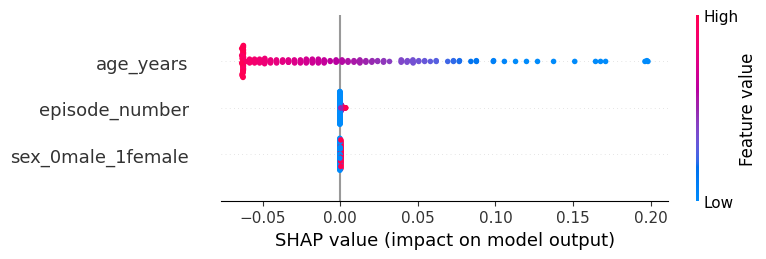

In [ ]:
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test[:200],feature_names=X_test.columns)

### Interpreting the results on the Shap summary plot
Considering the study cohort, the Shap graph demonstrates similar results to the previous one, with both showing that age is the most important feature. However, the second most important feature is episode number instead of sex, as seen in the previous graph. It appears that episode number and sex are not significant in helping predict the model outcome, indicating that individuals with lower age are more likely to experience death, while those with higher age are more likely to survive in this model.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))